# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mesa/time.py:79: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Budget: 809.3529452519309
before: 0.8435515959112435
None
Budget: 287.15940624478105
before: 0.7322518972585245
None
Budget: 5640.425227127039
before: 0
Sandbags
0.0
Budget: 1355.2213397776845
before: 0.4270770441642685
None
Budget: 1475.7141463696994
before: 0.7018835412897424
None
Budget: 4282.9155678772995
before: 0.8547543557731855
None
Budget: 1626.0847249596138
before: 0.5138463509235203
None
Budget: 2843.3611191359296
before: 0.4978699711820309
None
Budget: 1602.7419781200501
before: 0.6186537831560889
None
Budget: 2307.727557939094
before: 0.5619694203609288
None
Budget: 441.1453239279331
before: 0.47225580284478036
None
Budget: 1394.6938217548218
before: 0
None
Budget: 4253.254020053665
before: 0
None
Budget: 2723.8504184589806
before: 0.6206817242657956
None
Budget: 4379.702567324738
before: 0.46202545061265876
None
Budget: 4383.138312262898
before: 0.4457225190691432
None
Budget: 511.66731873050213
before: 0.6271655170970958
None
Budget: 3777.95545242321
before: 0.6401764793

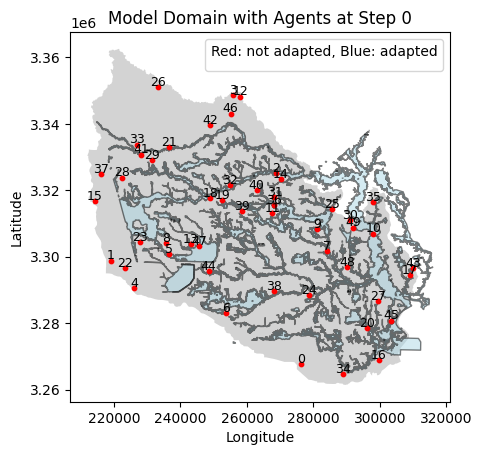

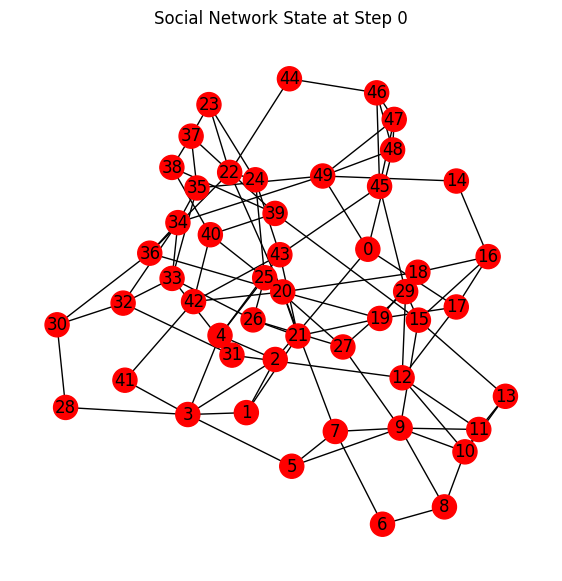

False
True
False
True
False
False
True
True
True
True
False
False
True
False
False
False
False
False
True
False
False
False
True
False
True
True
False
True
True
True
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
True
True
False
True
Government step method called.
Supporting non-adapted households.
Non-adapted Households: [<agents.Households object at 0x12d4b3d10>, <agents.Households object at 0x12d4b1790>, <agents.Households object at 0x12d4b3e60>, <agents.Households object at 0x12d4b3ef0>, <agents.Households object at 0x12d4b3fe0>, <agents.Households object at 0x12d4b2ab0>, <agents.Households object at 0x12d4b0c20>, <agents.Households object at 0x12d4b3e90>, <agents.Households object at 0x12d52c080>, <agents.Households object at 0x12d52c0b0>, <agents.Households object at 0x12d52c0e0>, <agents.Households object at 0x12d52c140>, <agents.Households object at 0x12d52c170>, <agents.Households object at 0x12d52c1a0>, <agents.Households object 

<Figure size 1000x600 with 0 Axes>

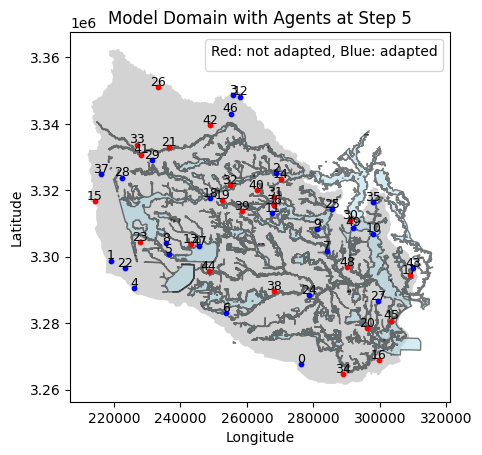

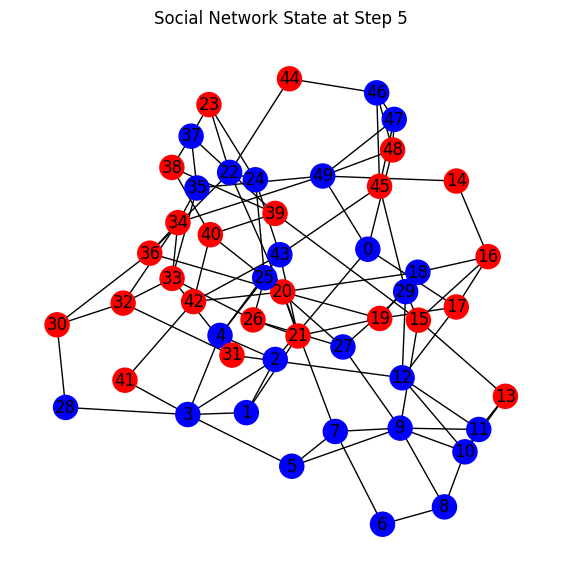

True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
True
False
True
False
True
False
True
True
False
True
True
True
False
False
False
False
False
True
True
True
False
False
True
False
False
True
False
False
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
True
False
True
False
True
False
True
True
False
True
True
True
False
False
False
False
False
True
True
True
False
False
True
False
False
True
False
False
True
True
False
True
Supporting non-adapted households.
Non-adapted Households: [<agents.Households object at 0x12d4b0c20>, <agents.Households object at 0x12d4b3e90>, <agents.Households object at 0x12d52c080>, <agents.Households object at 0x12d52c0b0>, <agents.Households object at 0x12d52c0e0>, <agents.Households object at 0x12d52c140>, <agents.Households object at 0x12d52c1a0>, <agents.Households object at 0x12d52c200>, <agents.Households object at 0x12d52c290>, <agents.Hou

<Figure size 1000x600 with 0 Axes>

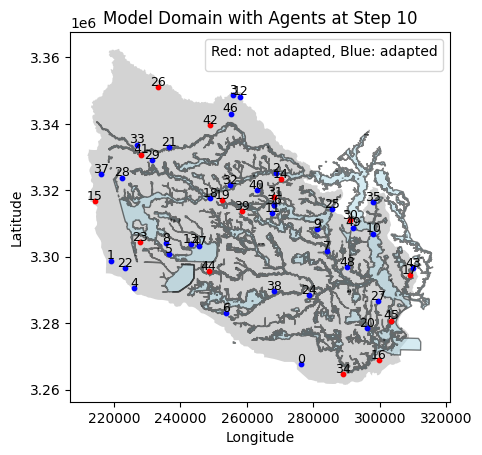

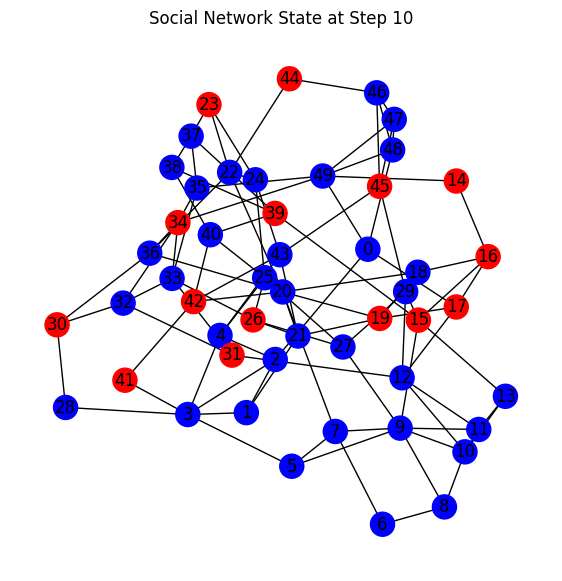

True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
True
False
True
True
True
False
True
True
False
True
True
True
False
False
True
True
False
True
True
True
True
False
True
False
False
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
True
False
True
True
True
False
True
True
False
True
True
True
False
False
True
True
False
True
True
True
True
False
True
False
False
True
False
False
True
True
True
True
Supporting non-adapted households.
Non-adapted Households: [<agents.Households object at 0x12d4b3e90>, <agents.Households object at 0x12d52c080>, <agents.Households object at 0x12d52c0b0>, <agents.Households object at 0x12d52c0e0>, <agents.Households object at 0x12d52c140>, <agents.Households object at 0x12d52c200>, <agents.Households object at 0x12d52c290>, <agents.Households object at 0x12d52c350>, <agents.Households object at 0x12d52c380>, <agents.Households obje

<Figure size 1000x600 with 0 Axes>

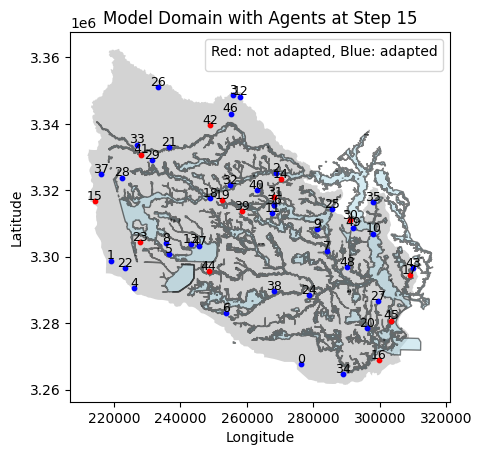

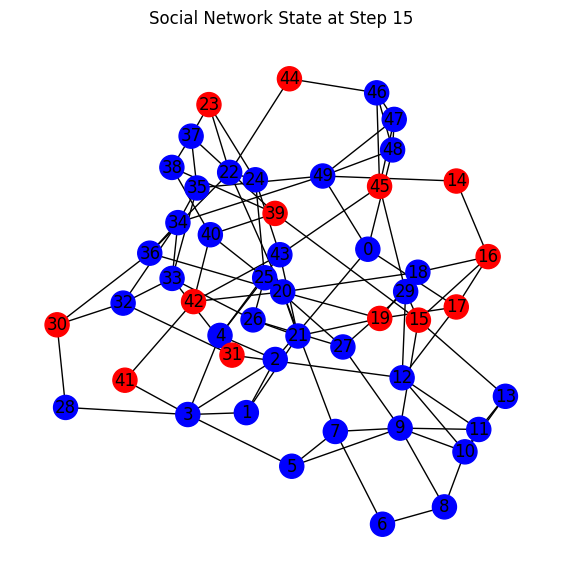

True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
True
False
True
True
True
False
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
False
True
False
False
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
True
False
True
True
True
False
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
False
True
False
False
True
False
False
True
True
True
True
Supporting non-adapted households.
Non-adapted Households: [<agents.Households object at 0x12d4b3e90>, <agents.Households object at 0x12d52c080>, <agents.Households object at 0x12d52c0b0>, <agents.Households object at 0x12d52c0e0>, <agents.Households object at 0x12d52c140>, <agents.Households object at 0x12d52c200>, <agents.Households object at 0x12d52c350>, <agents.Households object at 0x12d52c380>, <agents.Households object at 0x12d52c500>, <agents.Households object a

<Figure size 1000x600 with 0 Axes>

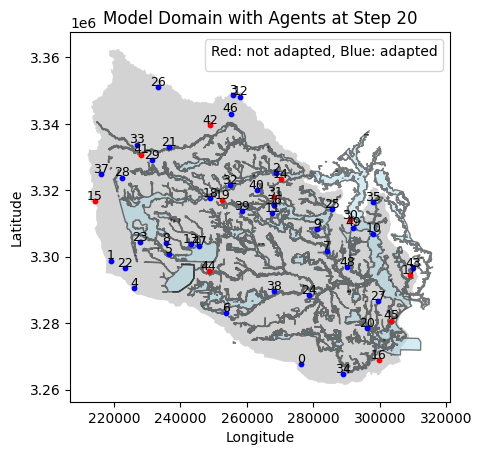

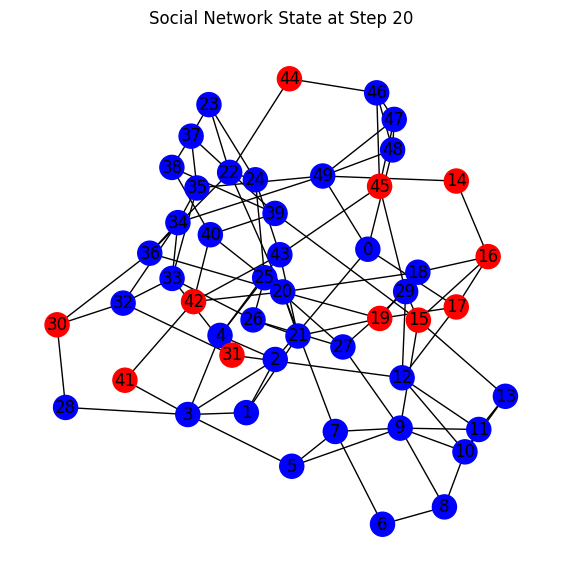

Sandbags: 8 times purchased
Elevating the house: 0 times purchased
Relocating electrical systems: 0 times purchased
None: 42 times purchased


In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from agents import Households
from agents import Government

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# # Define a function to plot agents on the network.
# # This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
        # Clear the current axes.
        ax.clear()
        # Determine the color of each node (agent) based on their adaptation status.
        colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents if isinstance(agent, Households)]
        # Draw the network with node colors and labels.
        nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
        # Set the title of the plot with the current step number.
        ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

 # Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

government_agent = Government(unique_id="gov_1", model=model)
model.schedule.add(government_agent)

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()
    
    # Assuming 'model' is your AdaptationModel instance
    government_agent.support_non_adapted_households()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

for measure, count in model.flood_measure_count.items():
    print(f"{measure}: {count} times purchased")


# Optionally, you can directly call methods of the Government agent here


In [2]:
agent_data = model.datacollector.get_model_vars_dataframe()
agent_data


,total_adapted_households
0,25
1,25
2,25
3,26
4,26
5,29
6,30
7,31
8,33
9,35


In [3]:
model_data = model.datacollector.get_agent_vars_dataframe()
model_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   1.835438              0.754332          0.000000   
     1                   0.219158              0.019163          0.000000   
     2                   8.865103              1.000000          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.264729              0.416248          0.000000   
...                           ...                   ...               ...   
19   47                  1.078650              0.033076          0.816257   
     48                  0.290379              0.432395          0.230021   
     49                  0.000000              0.000000          0.000000   
     gov_1                    NaN                   NaN               NaN   
     gov_1                    NaN                   NaN               NaN   

              FloodDamageActual IsAdapted  FriendsCount  \
Step AgentID                                              
0    0                 0.000000      True           4.0   
     1                 0.000000      True           3.0   
     2                 0.000000      True           4.0   
     3                 0.000000      True           6.0   
     4                 0.000000      True           4.0   
...                         ...       ...           ...   
19   47                0.612852      True           4.0   
     48                0.391711      True           4.0   
     49                0.000000      True           6.0   
     gov_1                  NaN      None           NaN   
     gov_1                  NaN      None           NaN   

                                                   location         wealth  \
Step AgentID                                                                 
0    0          POINT (276401.2901629574 3267708.732372712)   14372.612455   
     1         POINT (219022.77116341135 3298832.326231181)    9511.972647   
     2         POINT (268682.8985390833 3325270.2969819373)    8444.867048   
     3         POINT (255749.37167893455 3348765.312075525)   11018.053305   
     4         POINT (226136.16668085285 3290480.703443055)   18522.809182   
...                                                     ...            ...   
19   47       POINT (245631.99524889898 3303202.3210849334)   82550.064275   
     48         POINT (290209.9344964352 3296872.914037725)  113292.993967   
     49       POINT (291985.89040900813 3308811.1467455174)   60483.419626   
     gov_1                                             None            NaN   
     gov_1                                             None            NaN   

                           selected_measure reduction_factors household_info  
Step AgentID                                                                  
0    0                             Sandbags              None           None  
     1                             Sandbags              None           None  
     2                                 None              None           None  
     3                             Sandbags              None           None  
     4                                 None              None           None  
...                                     ...               ...            ...  
19   47                            Sandbags              None           None  
     48       Relocating electrical systems              None           None  
     49                                None              None           None  
     gov_1                             None              None           None  
     gov_1                             None              None           None  

[1040 rows x 11 columns]